In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('Add_sales_data_2018.csv')
data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
data.shape

(205, 7)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  205 non-null    object 
 1   Add1(in Thousands)    205 non-null    float64
 2   Add2(in Thousands)    205 non-null    float64
 3   Add3(in Thousands)    205 non-null    float64
 4   Add4(in Thousands)    205 non-null    float64
 5   Add5(in Thousands)    205 non-null    float64
 6   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [6]:
data.isna().sum()

Date                    0
Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

In [7]:
data.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


A textile company regularly spent money on five advertising companies for their ads. (Dataset added along with)

# 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

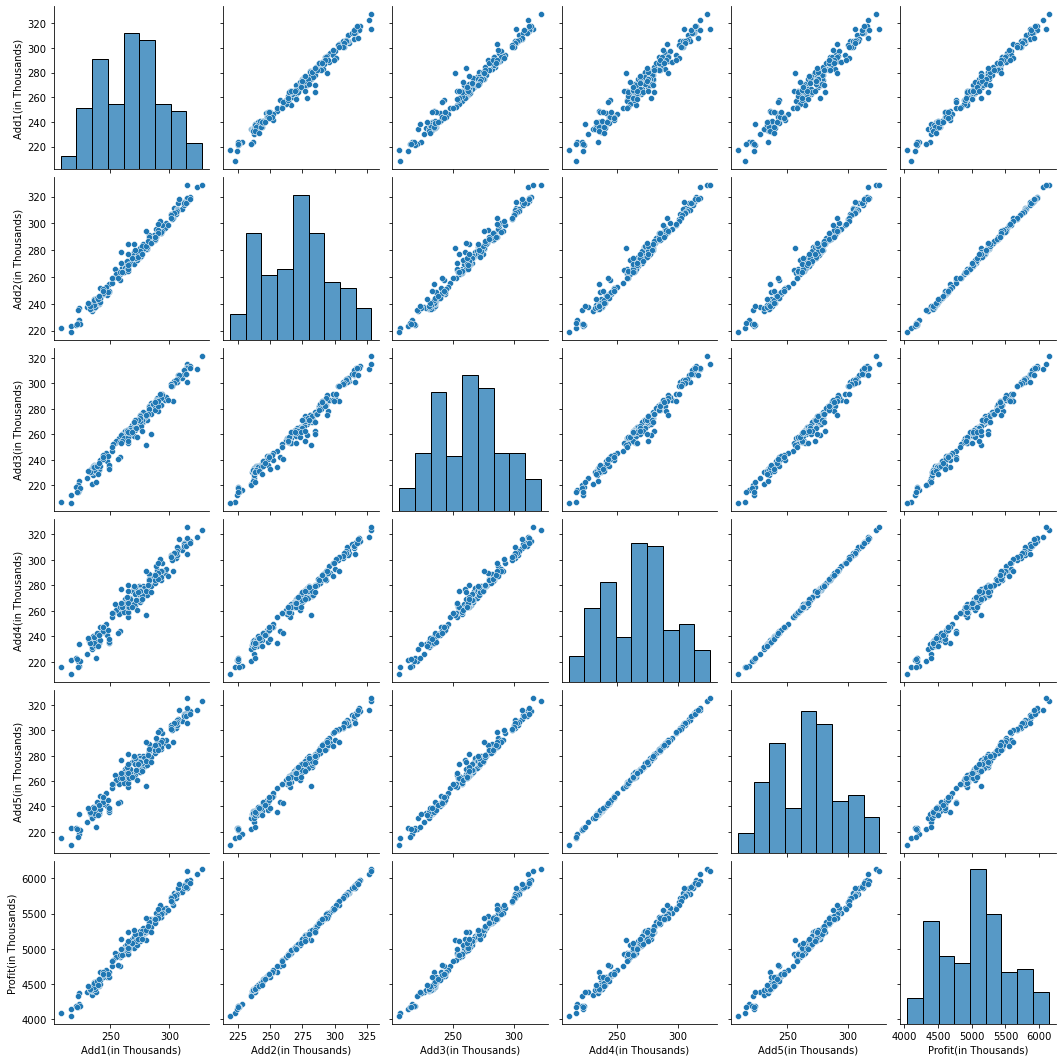

In [8]:
sns.pairplot(data)

<AxesSubplot:>

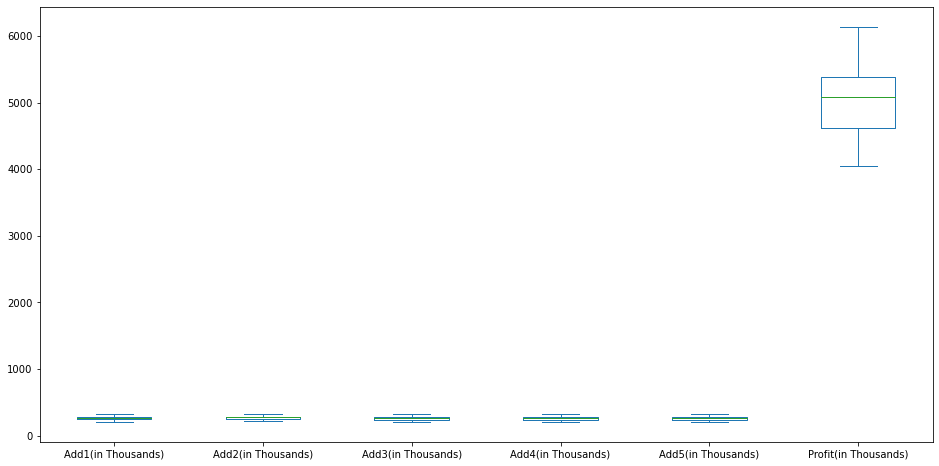

In [9]:
data.plot(kind='box',figsize=(16,8))

<AxesSubplot:>

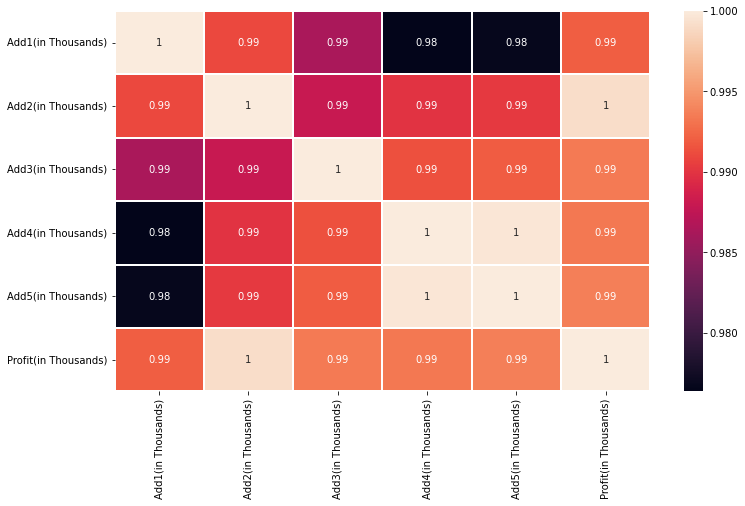

In [11]:
corr_matrix=data.corr()

plt.subplots(figsize=(12,7))
sns.heatmap(corr_matrix,linewidth=.2,annot=True)

There is a substantial link between earnings and the amount of money spent on advertising by five different companies. The greater the amount of money spent on advertising, the greater the profit.

# 2. Build a regression model to predict the profit from the given data and comment your findings on it

In [12]:
data=data.drop('Date',axis=1)
data

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,208.00,222.25,206.85,216.00,215.15,4093.065
1,217.00,218.60,205.90,210.25,209.20,4042.448
2,223.50,227.80,216.15,217.25,218.20,4213.819
3,230.00,237.50,225.75,226.45,227.60,4391.665
4,234.55,234.60,221.05,230.30,230.90,4350.683
...,...,...,...,...,...,...
200,288.00,288.25,279.20,284.50,284.30,5374.105
201,290.00,292.50,282.20,284.80,284.45,5439.655
202,298.60,298.60,286.65,287.45,287.80,5545.013
203,290.00,299.55,285.90,297.85,298.35,5565.444


In [14]:
X=data.drop('Profit(in Thousands)',axis=1)
Y=data['Profit(in Thousands)']

In [15]:
X

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,208.00,222.25,206.85,216.00,215.15
1,217.00,218.60,205.90,210.25,209.20
2,223.50,227.80,216.15,217.25,218.20
3,230.00,237.50,225.75,226.45,227.60
4,234.55,234.60,221.05,230.30,230.90
...,...,...,...,...,...
200,288.00,288.25,279.20,284.50,284.30
201,290.00,292.50,282.20,284.80,284.45
202,298.60,298.60,286.65,287.45,287.80
203,290.00,299.55,285.90,297.85,298.35


In [16]:
Y

0      4093.065
1      4042.448
2      4213.819
3      4391.665
4      4350.683
         ...   
200    5374.105
201    5439.655
202    5545.013
203    5565.444
204    5421.842
Name: Profit(in Thousands), Length: 205, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.3,random_state=42)


In [19]:
X_test

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
15,216.35,223.70,212.65,221.65,222.65
9,233.55,239.20,230.75,234.00,233.30
100,280.00,281.35,251.85,257.00,255.90
132,258.05,263.50,253.70,263.45,262.20
68,265.10,268.40,261.20,263.15,265.60
...,...,...,...,...,...
56,265.00,265.75,257.55,258.30,258.90
128,276.00,277.55,271.70,275.30,274.80
76,279.15,281.00,271.45,272.20,272.15
144,270.50,274.20,265.00,273.15,273.40


In [23]:
from sklearn import linear_model
model=linear_model.LinearRegression()
lr = model.fit(X_train,Y_train)

In [24]:
y_pred=model.predict(X_test)

In [25]:
y_pred

array([4152.066, 4446.441, 5131.898, 4907.56 , 5004.282, 4623.793,
       5384.175, 5328.025, 5175.051, 5956.323, 5780.799, 4997.719,
       5075.858, 5784.54 , 4936.12 , 5065.652, 4190.965, 5034.726,
       5015.536, 5134.657, 5145.131, 5421.94 , 4569.293, 4598.292,
       4436.321, 4175.677, 5616.791, 5667.25 , 4648.834, 5717.838,
       5001.615, 5182.368, 5017.503, 5545.013, 5013.207, 5030.451,
       5108.626, 4760.877, 4606.34 , 4925.861, 5250.788, 5038.222,
       5491.792, 5019.997, 4647.356, 4486.38 , 4435.174, 5300.437,
       5425.19 , 4482.183, 4193.095, 6062.457, 4887.296, 5805.521,
       4705.198, 4404.686, 5465.277, 4947.72 , 5185.639, 5225.14 ,
       5111.806, 5518.561])

In [26]:
Y_test

15     4152.066
9      4446.441
100    5131.898
132    4907.560
68     5004.282
         ...   
56     4947.720
128    5185.639
76     5225.140
144    5111.806
104    5518.561
Name: Profit(in Thousands), Length: 62, dtype: float64

In [27]:
model.score(X_test,Y_test)

1.0

In [29]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,y_pred)


3.602238151440604e-24

The y test results reveal that the predicted values are identical, with a Mean Squared Error of 3.602238151440604e-24, which is exceptionally low

# 3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.

In [30]:
prof_pred=model.predict([[290,312,309,298,320]])
prof_pred

array([5820.06])

An estimated profit (in thousands) of 5820 will be generated.